# Week 11 Assignment

Due date: Thurs, Nov 5 by 3:30pm (submit on Sakai)

## Annotating protein domains in JalView

Fig 3 in [Hu et al. 2020](https://doi.org/10.1038/s41579-020-00459-7) shows a schematic overview of the domain structure of coronavirus spike proteins. 

Note: For reviews of the roles these domains play, see the following references

* Du L, He Y, Zhou Y, Liu S, Zheng BJ, Jiang S. The spike protein of SARS-CoV--a target for vaccine and therapeutic development. Nat Rev Microbiol. 2009 Mar;7(3):226-36. doi: 10.1038/nrmicro2090. Epub 2009 Feb 9. PMID: 19198616; PMCID: PMC2750777.

* Heald-Sargent T, Gallagher T. Ready, set, fuse! The coronavirus spike protein and acquisition of fusion competence. Viruses. 2012 Apr;4(4):557-80. doi: 10.3390/v4040557. Epub 2012 Apr 12. PMID: 22590686; PMCID: PMC3347323.

* Li F. Structure, Function, and Evolution of Coronavirus Spike Proteins. Annu Rev Virol. 2016 Sep 29;3(1):237-261. doi: 10.1146/annurev-virology-110615-042301. Epub 2016 Aug 25. PMID: 27578435; PMCID: PMC5457962.


### Problem 1 (5 pts)

Create a TSV formatted Jalview seqeunce feature file for the following SARS-CoV-2 spike protein domains, as delineated in Fig 3a of Hu et al. (make sure you use the SARS-CoV-2 residue numberings rather than SARS-CoV)

- SP 
- RBD/RBM
- FP
- HR1
- HR2
- TM





Import the TSV sequence feature file into your Spike protein alignment in Jalview, to help you identify the regions in your alignment corresponding to these domains. 

Then, for each of these domain regions use the "Copy" and "Paste to new alignment" commands (in the Edit menu) in Jalview to extract these domain regions as "domain alignments". 

For each domain alignment generate a figure (PNG format) showing the alignment in this region AND export the domain alignment to a FASTA file (i.e. you will make 6 derived FASTA files after this step).  

### Embed your images directly in your Jupyter notebook

You can directly embed images in your Jupyter notebook by doing the following:

1. Create a markdown cell (It has to be a markdown cell, code cells won't work)
2. Select a PNG file from the Finder / File explorer and drag it onto your browser window into the markdown cell
3. Jupyter will automatically create some markdown like the following, which when evaluated will embed the image in your document.

```
![rbd.png](attachment:rbd.png)
```

See the image below for what the markdown cell will look like after it's evaluated.

Use markdown headers to indicate which domain your image corresponds to.  If you have trouble embedding the images directly in your notebook you can submit them as separate files when uploading your submission to Sakai.


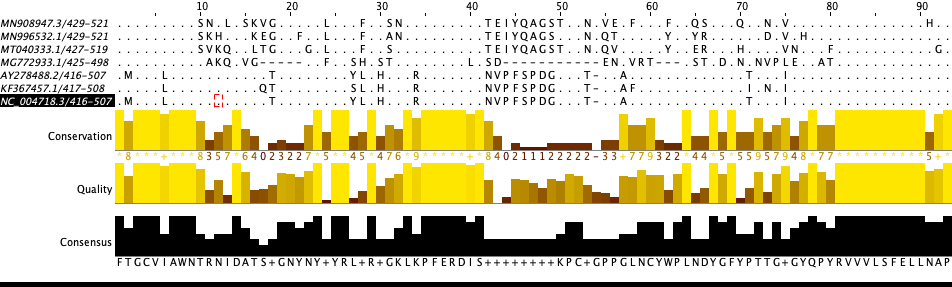

## Analyzing sequence conservation within domains

The `Bio.AlignIO` module can be used to parse multiple sequence alignments, as illustrated below (also see the [Bio.AlignIO API docs](https://biopython.org/docs/latest/api/Bio.Align.html#)):

In [1]:
from Bio import AlignIO

In [2]:
alignment = AlignIO.read("../data/Spike-protein-aligned.fasta", format="fasta")

In [3]:
type(alignment) 

Bio.Align.MultipleSeqAlignment

In [4]:
len(alignment) # return number of sequences in alignment

7

In [5]:
alignment.get_alignment_length()  # returns length (including gaps) of the aligned sequences

1281

In [6]:
print(alignment)  # by default will show an abbreviated version of alignment

SingleLetterAlphabet() alignment with 7 rows and 1281 columns
MKLLVLVF-ATLVSSYTIEKCLDFDDRT--PPANTQFLSSHRGV...HYT KF367457.1
M-FIFLLF-LTLTSGSDLDRCTTFDDVQ--APNYTQHTSSMRGV...HYT AY278488.2
M-FIFLLF-LTLTSGSDLDRCTTFDDVQ--APNYTQHTSSMRGV...HYT NC_004718.3
M-LFFLFLQFALVNS----QCVNLTGRTPLNPNYTN--SSQRGV...HYT MG772933.1
M-FVFLFV-LPLVSS----QCVNLTTRTGIPPGYTN--SSTRGV...HYT MT040333.1
M-FVFLVL-LPLVSS----QCVNLTTRTQLPPAYTN--SFTRGV...HYT MN908947.3
M-FVFLVL-LPLVSS----QCVNLTTRTQLPPAYTN--SSTRGV...HYT MN996532.1


The data in an alignment can be accessed in an array-like fashion as shown below:

In [7]:
print(alignment[:2,:10])  # first two seqs, first 10 residues

SingleLetterAlphabet() alignment with 2 rows and 10 columns
MKLLVLVF-A KF367457.1
M-FIFLLF-L AY278488.2


In [8]:
alignment[:,0]  # all the residues in the first column of the alignment (remember 0-indexing)

'MMMMMMM'

In [9]:
alignment[:,1]  # all the residues in the second column of the alignment (remember 0-indexing)

'K------'

## Problem 2a (5 pts)

Write a function, `percent_alignment_identity`, that takes as input a FASTA file representing a multiple sequence alignment, and which returns the percent of the positions in the alignment where are all the sequences in the alignment are identical. NOTE: this is a very simplistic measure of conservation of a domain but can be useful nonetheless.

HINT:  the built-in Python `set` object may be particularly useful for this task. 

In [10]:
set(alignment[:,0])  # using the alignment illustrated above

{'M'}

In [11]:
set(alignment[:,1]) 

{'-', 'K'}

In [12]:
def percent_alignment_identity(alignmentfile):
    """Calculates percent identical positions in a multiple sequence alignment file"""
    pass # replace with your code

## Problem 2b (5 pts)

Using your `percent_alignment_identity` function defined above, calculate the overall percent identity of the alignment of the Spike protein as a whole (i.e. Using `Spike-protein-aligned.fasta` as input), as well as the percent identity for each of the domains files you created in Problem 1. Which of the domains shows the greatest/least conservation?  (NOTE: If you included the conservation tracks in the images you created in Problem 1 you can use those as a reality-check for you implementation/results)